In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# basic settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

#avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv("Lead Scoring.csv")
df_raw.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df_raw['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [4]:
df_raw.shape

(9240, 37)

In [5]:
df_raw.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df_raw.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
missing_percentage = (df_raw.isnull().sum()/len(df_raw))*100
missing_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
df_raw.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
#copy the raw data for cleaning
df=df_raw.copy()
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
df.drop(columns=["Prospect ID", "Lead Number"], inplace=True)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
yes_no_columns = []

for col in df.columns:
    values = df[col].astype(str).str.lower().unique()
    
    if 'yes' in values or 'no' in values:
        yes_no_columns.append(col)

yes_no_columns

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [14]:
binary_cols = [
    "Do Not Email", "Do Not Call", "Search", "Magazine",
    "Newspaper Article", "X Education Forums", "Newspaper",
    "Digital Advertisement", "Through Recommendations",
    "Receive More Updates About Our Courses",
    "Update me on Supply Chain Content", "Get updates on DM Content",
    "I agree to pay the amount through cheque",
    "A free copy of Mastering The Interview"
]

for col in binary_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().map({
        "yes": 1,
        "no": 0
    })

In [15]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [16]:
df['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [17]:
#Reason outliers present in the columns
df["TotalVisits"] = df["TotalVisits"].fillna(df["TotalVisits"].median())

In [18]:
df['Page Views Per Visit']=df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median())

In [19]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [20]:
df['Last Activity']=df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [21]:
df["Country"]=df["Country"].fillna("Unknown")

In [22]:
df["City"]=df["City"].fillna("Unknown")

In [23]:
profile_cols = [
    "Specialization",
    "How did you hear about X Education",
    "What is your current occupation",
    "What matters most to you in choosing a course"
]

for col in profile_cols:
    df[col].fillna("Unknown", inplace=True)

In [24]:
df[df['Lead Source']=='Welingak Website'].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,0,0,1,3.0,1096,2.0,Email Opened,Unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,NaN,0,0,Select,Select,02.Medium,02.Medium,14.0,15.0,0,0,Modified
81,Lead Add Form,Welingak Website,0,0,1,3.0,346,2.0,Email Opened,Unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,NaN,0,0,Select,Select,02.Medium,02.Medium,14.0,15.0,0,0,Modified
134,Lead Add Form,Welingak Website,0,0,1,3.0,889,2.0,Email Opened,Unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,NaN,0,0,Select,Select,02.Medium,02.Medium,14.0,15.0,0,0,Modified
177,Lead Add Form,Welingak Website,0,0,1,3.0,1240,2.0,Email Opened,Unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Closed by Horizzon,Low in Relevance,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,18.0,0,0,Modified
179,Lead Add Form,Welingak Website,0,0,1,3.0,458,2.0,Email Opened,Unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,NaN,NaN,0,0,Select,Select,02.Medium,02.Medium,14.0,15.0,0,0,Modified


In [25]:
df["Lead Source"].fillna(df["Lead Source"].mode()[0], inplace=True)

top_sources = ["Google", "Direct Traffic", "Organic Search", "Facebook", "Olark Chat"]

df["Lead Source"] = df["Lead Source"].apply(
    lambda x: x if x in top_sources else "Other"
)

In [26]:
df["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Other', 'Facebook'], dtype=object)

In [27]:
def tag_mapper(tag):
    if pd.isna(tag):
        return "Unknown"
    elif "Interested" in tag:
        return "High Intent"
    elif tag in ["Busy", "Ringing"]:
        return "Medium Intent"
    else:
        return "Low Intent"

df["Tag_Group"] = df["Tags"].apply(tag_mapper)
df.drop(columns=["Tags"], inplace=True)


In [28]:
df.drop(columns=["Lead Quality"], inplace=True)

In [29]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Tag_Group
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified,High Intent
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,Medium Intent
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,Low Intent
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,Medium Intent
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,Low Intent


In [30]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Tag_Group'],
      dtype='object')

In [31]:
df.shape[1]

34

In [32]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [33]:
df["Lead Profile"].fillna("Unknown", inplace=True)

In [34]:
df['Lead Profile'].isnull().sum()

0

In [35]:
df.drop(columns=[
    "Asymmetrique Activity Index",
    "Asymmetrique Profile Index"
], inplace=True)

In [36]:
df.shape[1]

32

In [37]:
df["Asymmetrique Activity Score"].fillna(
    df["Asymmetrique Activity Score"].median(), inplace=True
)

In [38]:
df["Asymmetrique Profile Score"].fillna(
    df["Asymmetrique Profile Score"].median(), inplace=True
)

In [39]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [41]:
df["Total Time Spent on Website"] = df["Total Time Spent on Website"].astype(float)

In [42]:
df["Converted"].unique()

array([0, 1], dtype=int64)

In [164]:
df.shape[1]

32

In [43]:
X = df.drop("Converted", axis=1)
y = df["Converted"]

In [44]:
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Tag_Group
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Unknown,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Select,15.0,15.0,0,0,Modified,High Intent
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Select,15.0,15.0,0,0,Email Opened,Medium Intent
2,Landing Page Submission,Direct Traffic,0,0,2.0,1532.0,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Potential Lead,Mumbai,14.0,20.0,0,1,Email Opened,Low Intent
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Mumbai,13.0,17.0,0,0,Modified,Medium Intent
4,Landing Page Submission,Google,0,0,2.0,1428.0,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select,Mumbai,15.0,18.0,0,0,Modified,Low Intent


In [45]:
X.shape[1]

31

In [46]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numeric_cols

(Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
        'Specialization', 'How did you hear about X Education',
        'What is your current occupation',
        'What matters most to you in choosing a course', 'Lead Profile', 'City',
        'Last Notable Activity', 'Tag_Group'],
       dtype='object'),
 Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
        'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
        'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'Receive More Updates About Our Courses',
        'Update me on Supply Chain Content', 'Get updates on DM Content',
        'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
        'I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview'],
       dtype='object'))

In [48]:
categorical_transformer = OneHotEncoder(
    drop="first",
    handle_unknown="ignore"
)

In [49]:
numeric_transformer = StandardScaler()

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)


In [51]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

In [52]:
clf = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ]
)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [54]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity', 'Tag_Gr...
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [55]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1] #probability of conversion

In [56]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[987, 149],
       [101, 611]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1136
           1       0.80      0.86      0.83       712

    accuracy                           0.86      1848
   macro avg       0.86      0.86      0.86      1848
weighted avg       0.87      0.86      0.87      1848



In [58]:
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=6,
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        random_state=42
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),

    "KNN": KNeighborsClassifier(
        n_neighbors=7
    ),

    "SVM": SVC(
        probability=True,
        kernel="rbf",
        random_state=42
    )
}

In [59]:
results = []

for name, model in models.items():
    
    clf = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"\n{name}")
    print("-" * 30)
    print("ROC-AUC:", round(roc_auc, 3))
    print(classification_report(y_test, y_pred))
    
    results.append({
        "Model": name,
        "ROC-AUC": roc_auc
    })



Logistic Regression
------------------------------
ROC-AUC: 0.932
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1136
           1       0.80      0.86      0.83       712

    accuracy                           0.86      1848
   macro avg       0.86      0.86      0.86      1848
weighted avg       0.87      0.86      0.87      1848


Decision Tree
------------------------------
ROC-AUC: 0.928
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1136
           1       0.86      0.81      0.83       712

    accuracy                           0.87      1848
   macro avg       0.87      0.86      0.87      1848
weighted avg       0.87      0.87      0.87      1848


Random Forest
------------------------------
ROC-AUC: 0.941
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1136
           1       0.88      0.81      0.84     

In [60]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [61]:
log_reg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

logreg_scores = cross_val_score(
    log_reg,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print("Logistic Regression CV ROC-AUC scores:", logreg_scores)
print("Mean ROC-AUC:", logreg_scores.mean())
print("Std Dev:", logreg_scores.std())

Logistic Regression CV ROC-AUC scores: [0.94520494 0.95354103 0.94127149 0.94205657 0.94441184]
Mean ROC-AUC: 0.9452971726621971
Std Dev: 0.00436946649838962


In [62]:
gb_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])

gb_scores = cross_val_score(
    gb_model,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print("Gradient Boosting CV ROC-AUC scores:", gb_scores)
print("Mean ROC-AUC:", gb_scores.mean())
print("Std Dev:", gb_scores.std())

Gradient Boosting CV ROC-AUC scores: [0.95875967 0.96600345 0.95667333 0.9545672  0.95826161]
Mean ROC-AUC: 0.9588530511499427
Std Dev: 0.0038628066277339506


In [63]:
svm_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", SVC(probability=True, random_state=42))
])

svm_scores = cross_val_score(
    svm_model,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print("SVM CV ROC-AUC scores:", svm_scores)
print("Mean ROC-AUC:", svm_scores.mean())
print("Std Dev:", svm_scores.std())


SVM CV ROC-AUC scores: [0.95483364 0.96142895 0.94764858 0.95538938 0.95786619]
Mean ROC-AUC: 0.9554333465054562
Std Dev: 0.0045349765767704366


In [64]:
cv_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Gradient Boosting", "SVM"],
    "Mean ROC-AUC": [
        logreg_scores.mean(),
        gb_scores.mean(),
        svm_scores.mean()
    ],
    "Std Dev": [
        logreg_scores.std(),
        gb_scores.std(),
        svm_scores.std()
    ]
})

cv_results


,Model,Mean ROC-AUC,Std Dev
0,Logistic Regression,0.945297,0.004369
1,Gradient Boosting,0.958853,0.003863
2,SVM,0.955433,0.004535


In [65]:
y_prob = clf.predict_proba(X_test)[:, 1]
y_prob

array([0.35863287, 0.72993674, 0.05988038, ..., 0.93247135, 0.20407934,
       0.08983762])

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

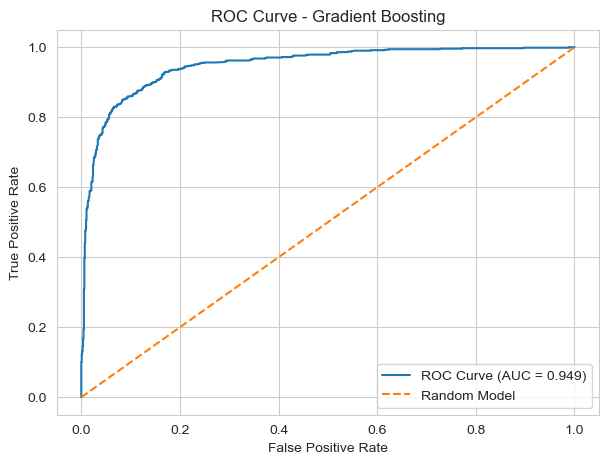

In [67]:
plt.figure(figsize=(7, 5))

plt.plot(
    fpr,
    tpr,
    label=f"ROC Curve (AUC = {roc_auc:.3f})"
)

# Random model reference line
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

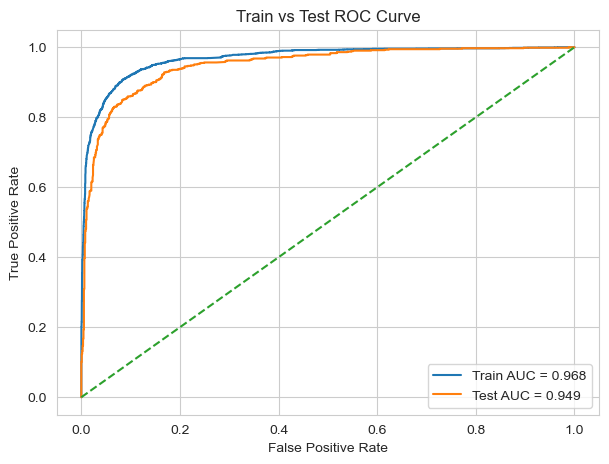

In [68]:
# Train probabilities
y_train_prob = clf.predict_proba(X_train)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(7,5))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_train:.3f}")
plt.plot(fpr, tpr, label=f"Test AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train vs Test ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [69]:
lead_score = (y_prob * 100).round(0)
lead_score

array([36., 73.,  6., ..., 93., 20.,  9.])

In [70]:
threshold = 0.7
y_pred_custom = (y_prob >= threshold).astype(int)
y_pred_custom

array([0, 1, 0, ..., 1, 0, 0])

In [71]:
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[[1081   55]
 [ 160  552]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1136
           1       0.91      0.78      0.84       712

    accuracy                           0.88      1848
   macro avg       0.89      0.86      0.87      1848
weighted avg       0.89      0.88      0.88      1848



In [72]:
def lead_bucket(score):
    if score >= 80:
        return "Hot Lead"
    elif score >= 60:
        return "Warm Lead"
    else:
        return "Cold Lead"

lead_category = pd.Series(lead_score).apply(lead_bucket)

In [73]:
lead_category.unique()

array(['Cold Lead', 'Warm Lead', 'Hot Lead'], dtype=object)

In [74]:
thresholds = np.arange(0.3, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    
    results.append({
        "Threshold": round(t, 2),
        "Precision": precision_score(y_test, y_pred_t),
        "Recall": recall_score(y_test, y_pred_t),
        "F1": f1_score(y_test, y_pred_t)
    })

threshold_df = pd.DataFrame(results)
threshold_df


,Threshold,Precision,Recall,F1
0,0.30,0.806861,0.891854,0.847231
1,0.35,0.823219,0.876404,0.848980
2,0.40,0.838095,0.865169,0.851417
3,0.45,0.850975,0.858146,0.854545
4,0.50,0.864748,0.844101,0.854300
5,0.55,0.879464,0.830056,0.854046
6,0.60,0.891437,0.818820,0.853587
7,0.65,0.899371,0.803371,0.848665
8,0.70,0.909390,0.775281,0.836998
9,0.75,0.919383,0.752809,0.827799


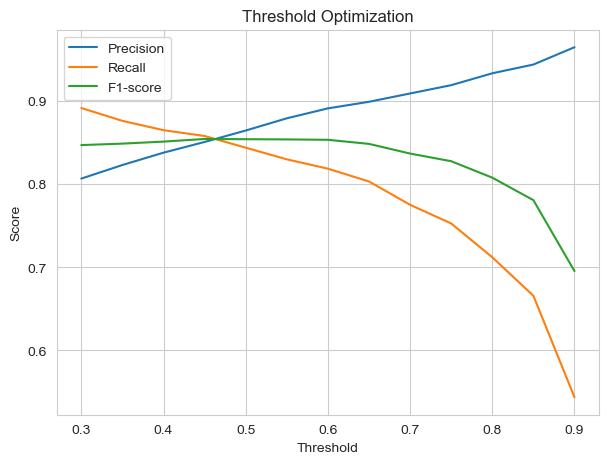

In [75]:
plt.figure(figsize=(7,5))
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], label="Precision")
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], label="Recall")
plt.plot(threshold_df["Threshold"], threshold_df["F1"], label="F1-score")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Optimization")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
final_threshold = 0.70
y_pred_final = (y_prob >= final_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

[[1081   55]
 [ 160  552]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1136
           1       0.91      0.78      0.84       712

    accuracy                           0.88      1848
   macro avg       0.89      0.86      0.87      1848
weighted avg       0.89      0.88      0.88      1848



In [77]:
lead_score = (y_prob * 100).round(0)

def lead_bucket(score):
    if score >= 80:
        return "Hot Lead"
    elif score >= 60:
        return "Warm Lead"
    else:
        return "Cold Lead"

lead_bucketed = pd.DataFrame({
    "Lead_Score": lead_score,
    "Lead_Category": pd.Series(lead_score).apply(lead_bucket),
    "Actual_Converted": y_test.values
})

lead_bucketed.head()

,Lead_Score,Lead_Category,Actual_Converted
0,36.0,Cold Lead,1
1,73.0,Warm Lead,1
2,6.0,Cold Lead,0
3,10.0,Cold Lead,0
4,1.0,Cold Lead,0


In [78]:
top_20_cutoff = np.percentile(lead_score, 80)
top_leads = y_test[lead_score >= top_20_cutoff]

top_leads.mean()

0.9685863874345549